In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20,20)

In [2]:
df = pd.read_csv('flights.csv.gz')

In [3]:
df.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
MONTH        58492 non-null int64
DAY          58492 non-null int64
WEEKDAY      58492 non-null int64
AIRLINE      58492 non-null object
ORG_AIR      58492 non-null object
DEST_AIR     58492 non-null object
SCHED_DEP    58492 non-null int64
DEP_DELAY    57659 non-null float64
AIR_TIME     57474 non-null float64
DIST         58492 non-null int64
SCHED_ARR    58492 non-null int64
ARR_DELAY    57474 non-null float64
DIVERTED     58492 non-null int64
CANCELLED    58492 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


In [5]:
#Analizando la data, vemos que hay data faltante, esto esta dado debido en que no se completo la data de AIR_TIME si un viaje fue completado, esto sera rellenado con 0 para evitar perder data, algo similar ocurre con el DEP_DELAY
df['AIR_TIME'] = df['AIR_TIME'].fillna(0)
df['DEP_DELAY'] = df['DEP_DELAY'].fillna(0)
df['ARR_DELAY'] = df['ARR_DELAY'].fillna(df['ARR_DELAY'].mean())

## Mostrar el número de vuelos cancelados por aerolínea por día

In [6]:
print('El numero de vuelos cancelados fue: {}'.format(df['CANCELLED'].value_counts()[1]))

El numero de vuelos cancelados fue: 881


In [7]:
print('El porcentaje de vuelos cancelados fue: {}'.format(df['CANCELLED'].value_counts('%')[1]))

El porcentaje de vuelos cancelados fue: 0.01506188880530671


## Mostrar el número y porcentaje de vuelos cancelados y desviados por día

In [8]:
labels = ['CANCELLED','DIVERTED']
num_fly, porcent_fly = [],[]

for col in labels:
    print('El numero de vuelos {} fue: {}'.format(col,df[col].value_counts()[1]))
    num_fly.append(df[col].value_counts()[1])
    print('El porcentaje de vuelos {} fue: {}'.format(col,df[col].value_counts('%')[1]))
    porcent_fly.append(df[col].value_counts('%')[1])

print('Total Vuelos Cancelados y Desviados: {}'.format(np.sum(num_fly)))
print('Porcentaje Vuelos Cancelados y Desviados: {}'.format(np.sum(porcent_fly)))

El numero de vuelos CANCELLED fue: 881
El porcentaje de vuelos CANCELLED fue: 0.01506188880530671
El numero de vuelos DIVERTED fue: 137
El porcentaje de vuelos DIVERTED fue: 0.0023422006428229503
Total Vuelos Cancelados y Desviados: 1018
Porcentaje Vuelos Cancelados y Desviados: 0.01740408944812966


## Para cada origen y destino, mostrar el total de vuelos, el número y porcentaje de vuelos cancelados y generar estadísticas para el tiempo de vuelo

In [38]:
print('Vuelos ordenados por Origen')
df['ORG_AIR'].value_counts()

Vuelos ordenados por Origen


ATL    10413
ORD     8394
DFW     7121
LAX     5889
DEN     5857
PHX     4603
SFO     4402
IAH     4384
LAS     4019
MSP     3410
Name: ORG_AIR, dtype: int64

Text(0.5, 1.0, 'Cantidad de Vuelos segun su Origen')

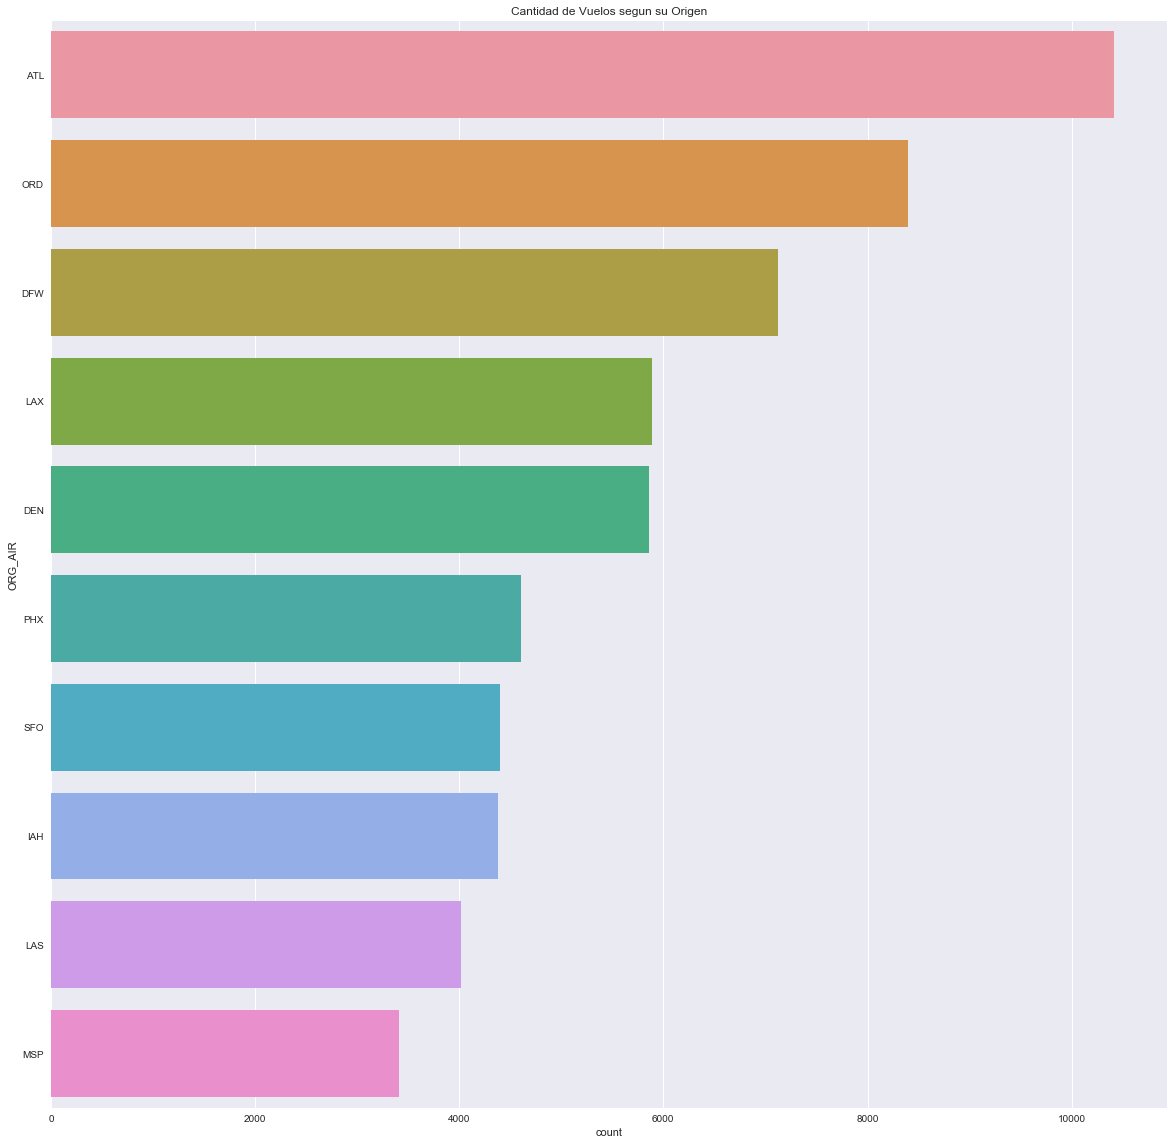

In [46]:
sns.countplot(y=df['ORG_AIR'], order = df['ORG_AIR'].value_counts().index)
plt.title('Cantidad de Vuelos segun su Origen')

In [36]:
print('Numero de viajes en base a los viajes cancelados y su origen')
df[df['CANCELLED'] == 1]['ORG_AIR'].value_counts()

Numero de viajes en base a los viajes cancelados y su origen


ORD    259
DFW    187
SFO     88
IAH     74
LAX     70
ATL     69
DEN     61
PHX     32
MSP     24
LAS     17
Name: ORG_AIR, dtype: int64

In [35]:
print('Porcentajes en base a los viajes cancelados y su origen')
df[df['CANCELLED'] == 1]['ORG_AIR'].value_counts('%')

Porcentajes en base a los viajes cancelados y su origen


ORD    0.293984
DFW    0.212259
SFO    0.099886
IAH    0.083995
LAX    0.079455
ATL    0.078320
DEN    0.069240
PHX    0.036322
MSP    0.027242
LAS    0.019296
Name: ORG_AIR, dtype: float64

In [52]:
print('Cantidad de Destinos')
df['DEST_AIR'].value_counts()

Cantidad de Destinos


LAX    1991
SFO    1637
ORD    1634
DEN    1581
DFW    1454
       ... 
INL       4
CEC       2
IMT       2
ITO       2
FAI       1
Name: DEST_AIR, Length: 271, dtype: int64

Text(0.5, 1.0, 'Cantidad de Vuelos segun su Destino')

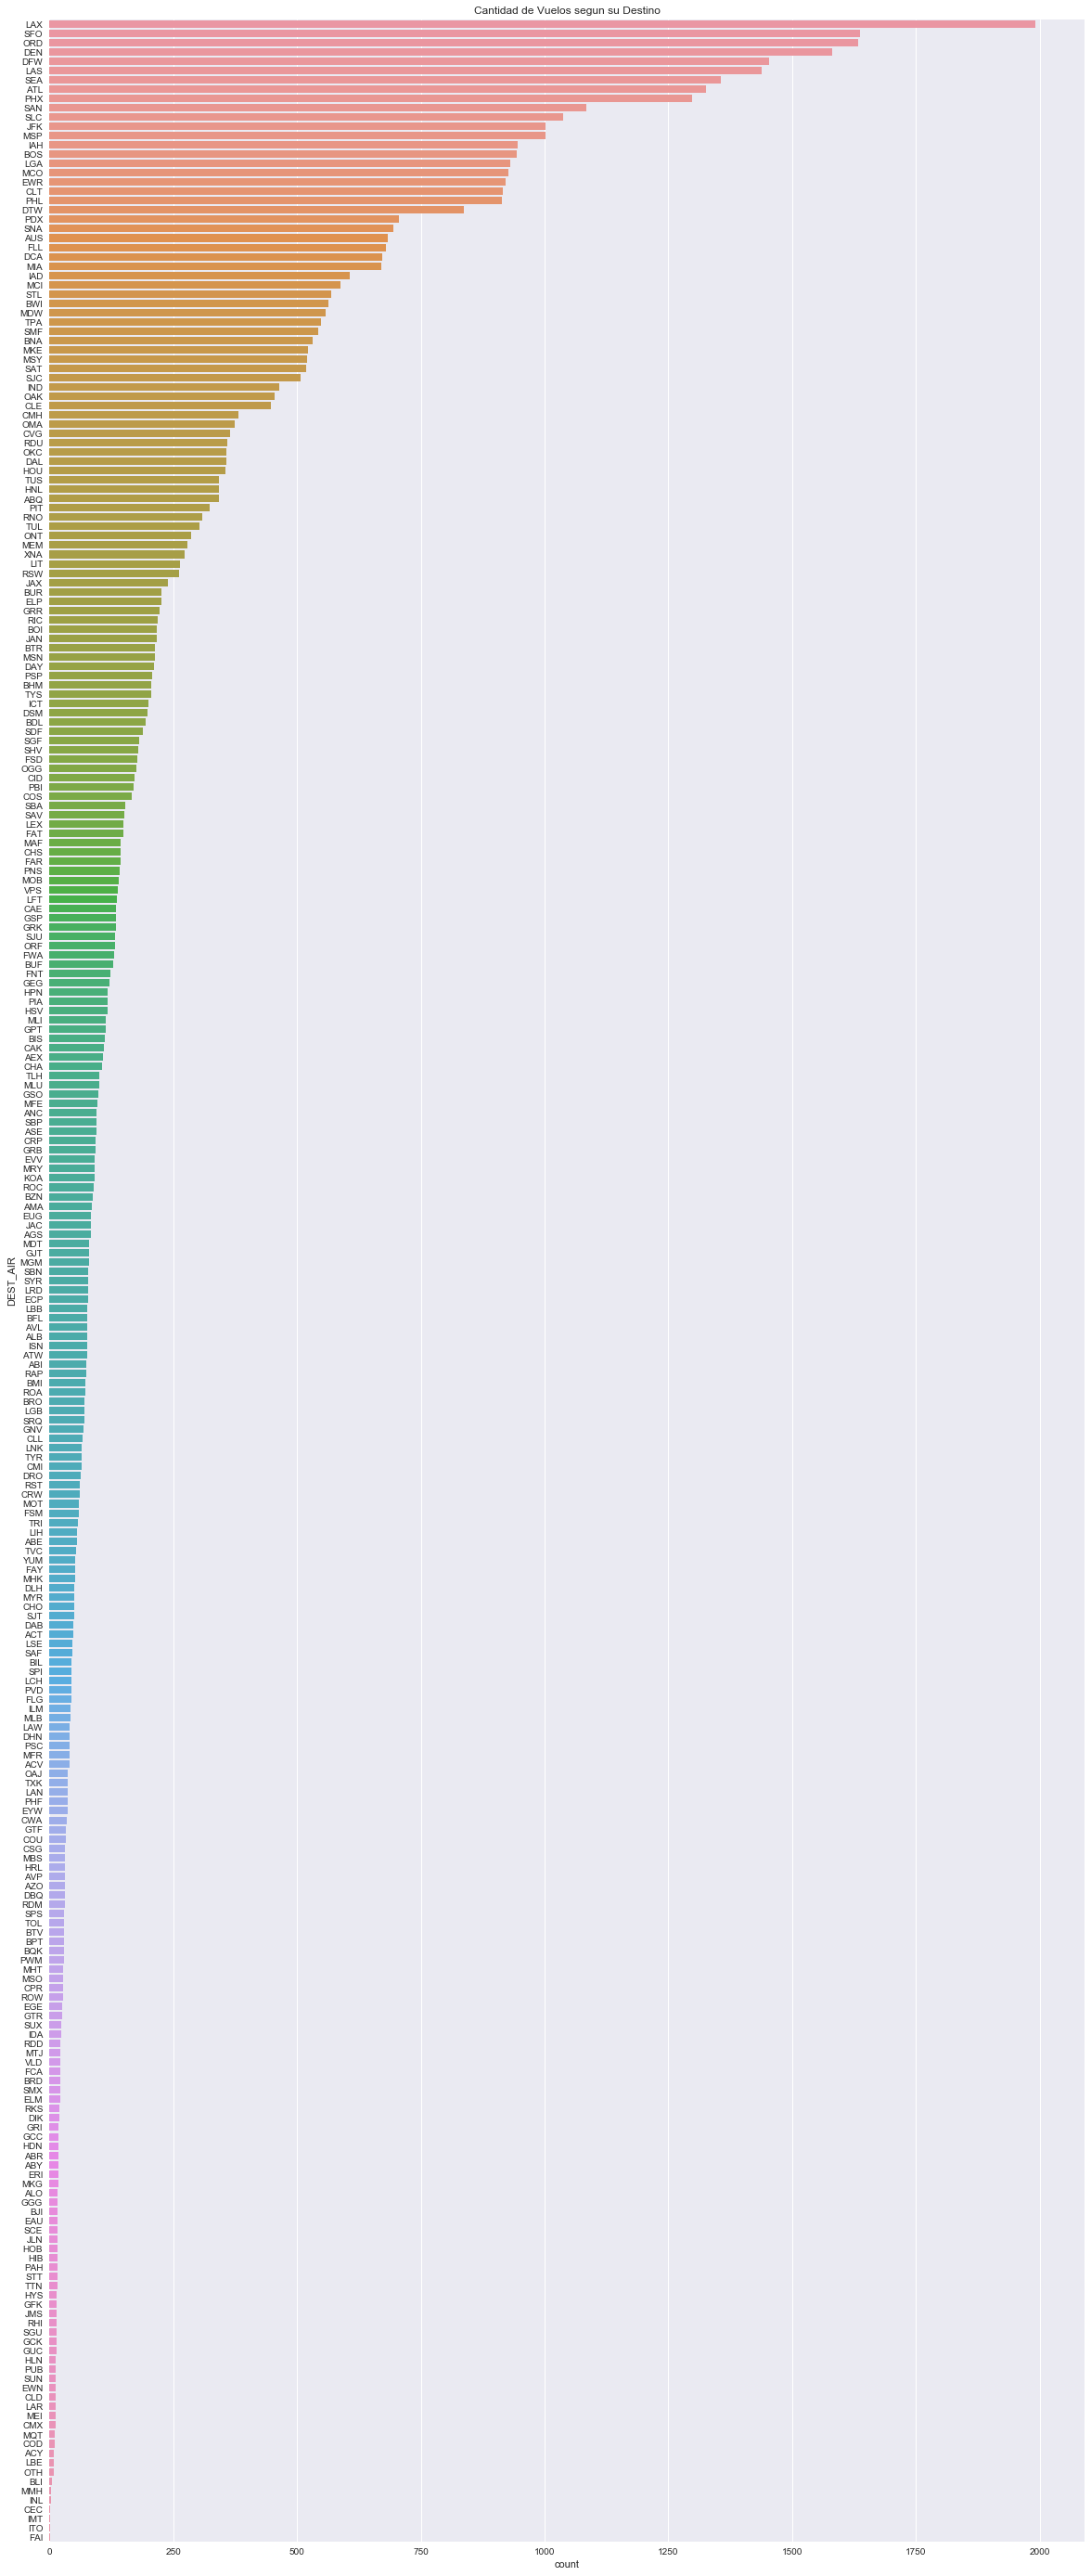

In [49]:
plt.rcParams['figure.figsize'] = (20,50)
sns.countplot(y=df['DEST_AIR'], order = df['DEST_AIR'].value_counts().index)
plt.title('Cantidad de Vuelos segun su Destino')

In [53]:
print('Numero de viajes en base a los viajes cancelados y su destino')
df[df['CANCELLED'] == 1]['DEST_AIR'].value_counts()

Numero de viajes en base a los viajes cancelados y su destino


LGA    31
LAX    29
DFW    27
EWR    25
ORD    22
       ..
CHA     1
SMX     1
BIS     1
ROA     1
SAV     1
Name: DEST_AIR, Length: 195, dtype: int64

In [54]:
print('Porcentajes en base a los viajes cancelados y su destino')
df[df['CANCELLED'] == 1]['DEST_AIR'].value_counts('%')

Porcentajes en base a los viajes cancelados y su destino


LGA    0.035187
LAX    0.032917
DFW    0.030647
EWR    0.028377
ORD    0.024972
         ...   
CHA    0.001135
SMX    0.001135
BIS    0.001135
ROA    0.001135
SAV    0.001135
Name: DEST_AIR, Length: 195, dtype: float64

In [57]:
df['AIR_TIME'].describe()

count    58492.000000
mean       113.910945
std         72.652425
min          0.000000
25%         59.000000
50%         96.000000
75%        150.000000
max        577.000000
Name: AIR_TIME, dtype: float64

In [65]:
print('Analizando los tiempos de vuelo tenemos que su promedio es {} , su desviacion es {} ,su tiempo minimo fue {} min y su maximo {} min'.format(df['AIR_TIME'].describe()['mean'].round(2),df['AIR_TIME'].describe()['std'].round(2),df['AIR_TIME'].describe()['min'],df['AIR_TIME'].describe()['max']))

Analizando los tiempos de vuelo tenemos que su promedio es 113.91 , su desviacion es 72.65 ,su tiempo minimo fue 0.0 min y su maximo 577.0 min


## Mostrar la distribución de aerolíneas que vuelan en los siguientes rangos de distancias:  [0, 200, 500, 1000, 2000, 2001+]

In [240]:
def count_dist(inicio, fin=9999999999):
    return ((df.DIST > inicio) & (df.DIST <= fin)).value_counts()

In [241]:
scores = {   
        'Viajes entre 0 y 200':count_dist(0,200) ,
        'Viajes entre 200 y 500':count_dist(200,500) , 
        'Viajes entre 500 y 1000':count_dist(500,1000) , 
        'Viajes entre 1000 y 2000':count_dist(1000,2000) , 
        'Viajes sobre 2000':count_dist(2001)}
scores = pd.DataFrame(scores)

In [255]:
print('Viajes entre 0 y 200 km {} '.format(count_dist(0,200)[True]))

Viajes entre 0 y 200 km 3719 


In [256]:
print('Viajes entre 200 y 500 km {} '.format(count_dist(200,500)[True]))

Viajes entre 200 y 500 km 15874 


In [257]:
print('Viajes entre 500 y 1000 km {} '.format(count_dist(500,1000)[True]))

Viajes entre 500 y 1000 km 20659 


In [258]:
print('Viajes entre 100 y 2000 km {} '.format(count_dist(1000,2000)[True]))

Viajes entre 100 y 2000 km 14186 


In [259]:
print('Viajes superior a 2001km {} '.format(count_dist(2001)[True]))

Viajes superior a 2001km 4054 


In [250]:
scores.head()

,Viajes entre 0 y 200,Viajes entre 200 y 500,Viajes entre 500 y 1000,Viajes entre 1000 y 2000,Viajes sobre 2000
False,54773,42618,37833,44306,54438
True,3719,15874,20659,14186,4054


##  Bonus: Generar un par de gráficos para visualizar el dataset

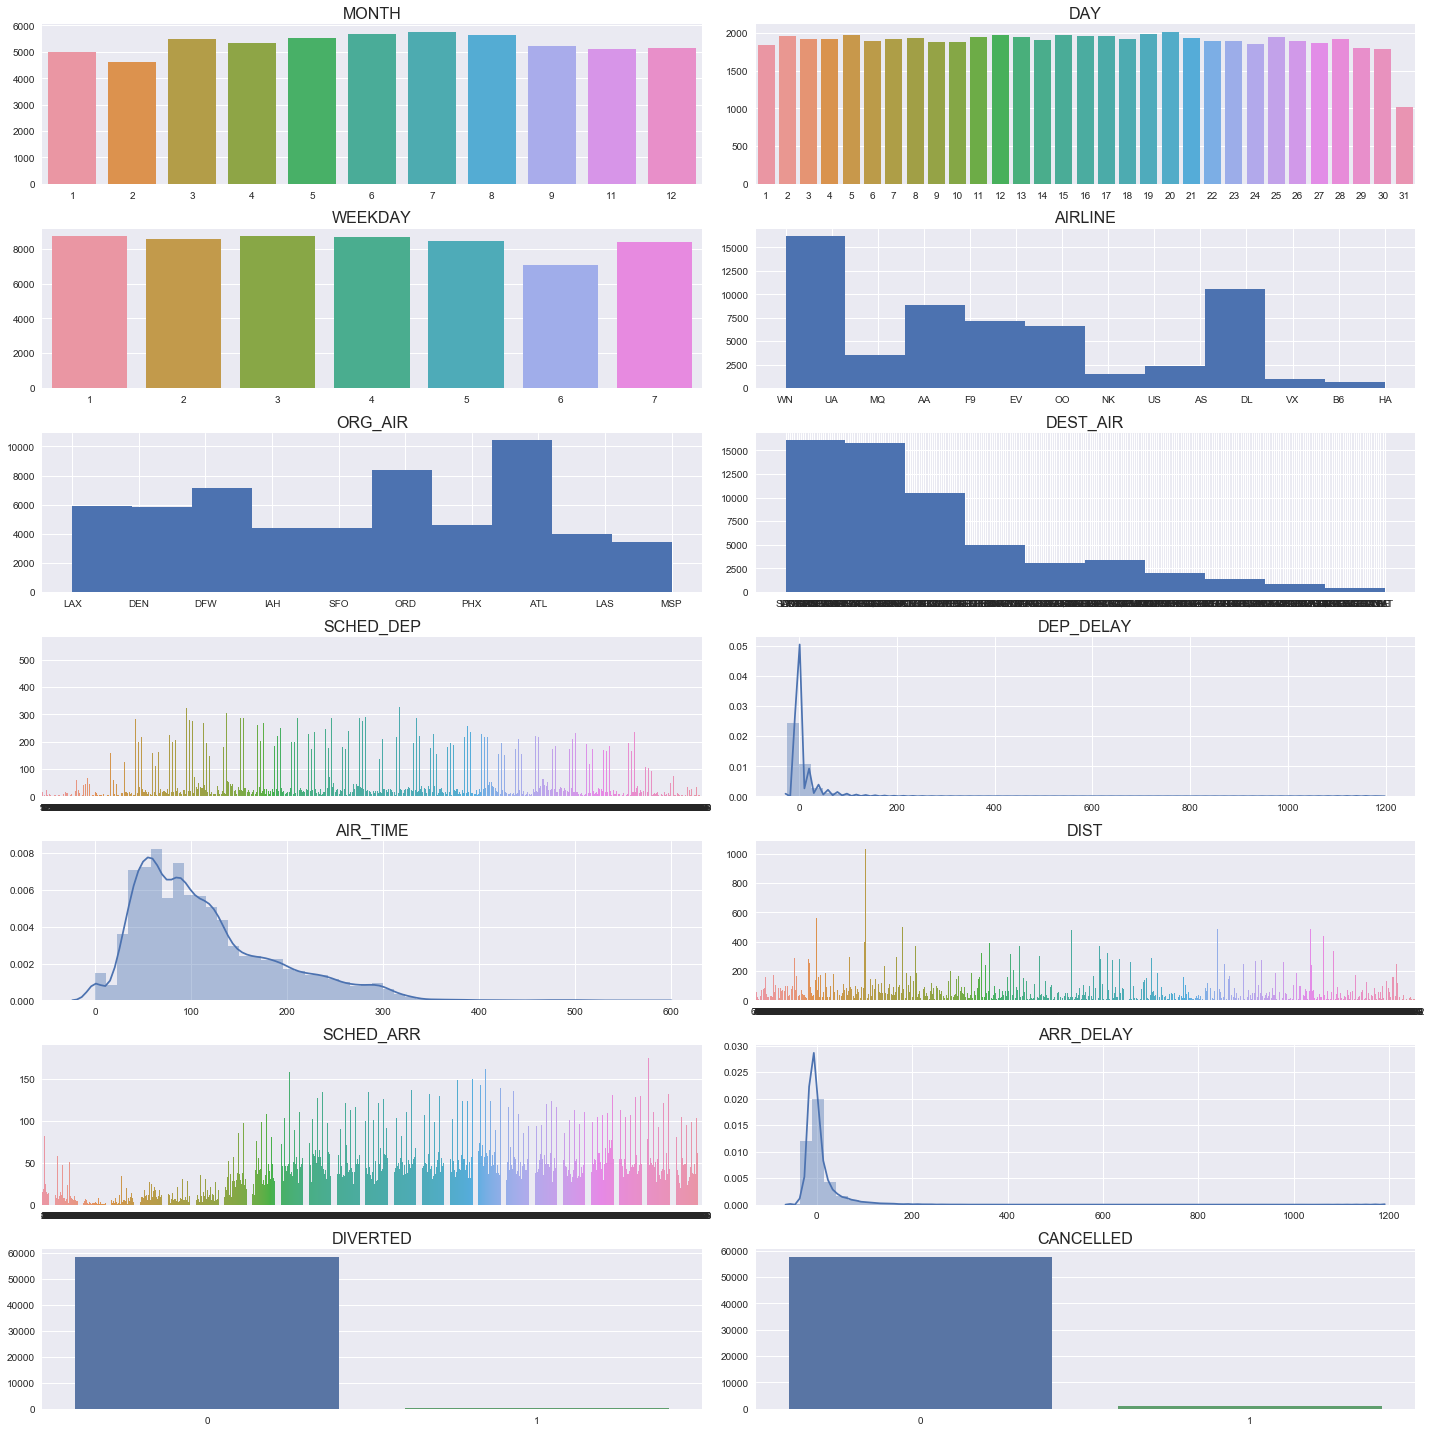

In [272]:
plt.rcParams['figure.figsize'] = (20,20)
rows = 7
cols = 2
for index , (colname,serie) in enumerate(df.iteritems()):
    plt.subplot(rows,cols, index+1)
    if pd.api.types.is_float_dtype(serie) is True:
        sns.distplot(serie)
    elif pd.api.types.is_integer_dtype(serie) is True:
        sns.countplot(serie)
    elif pd.api.types.is_object_dtype(serie) is True:
        plt.hist(serie)
    plt.title(colname, fontsize=16)
    plt.xlabel(''); plt.ylabel('');plt.tight_layout()

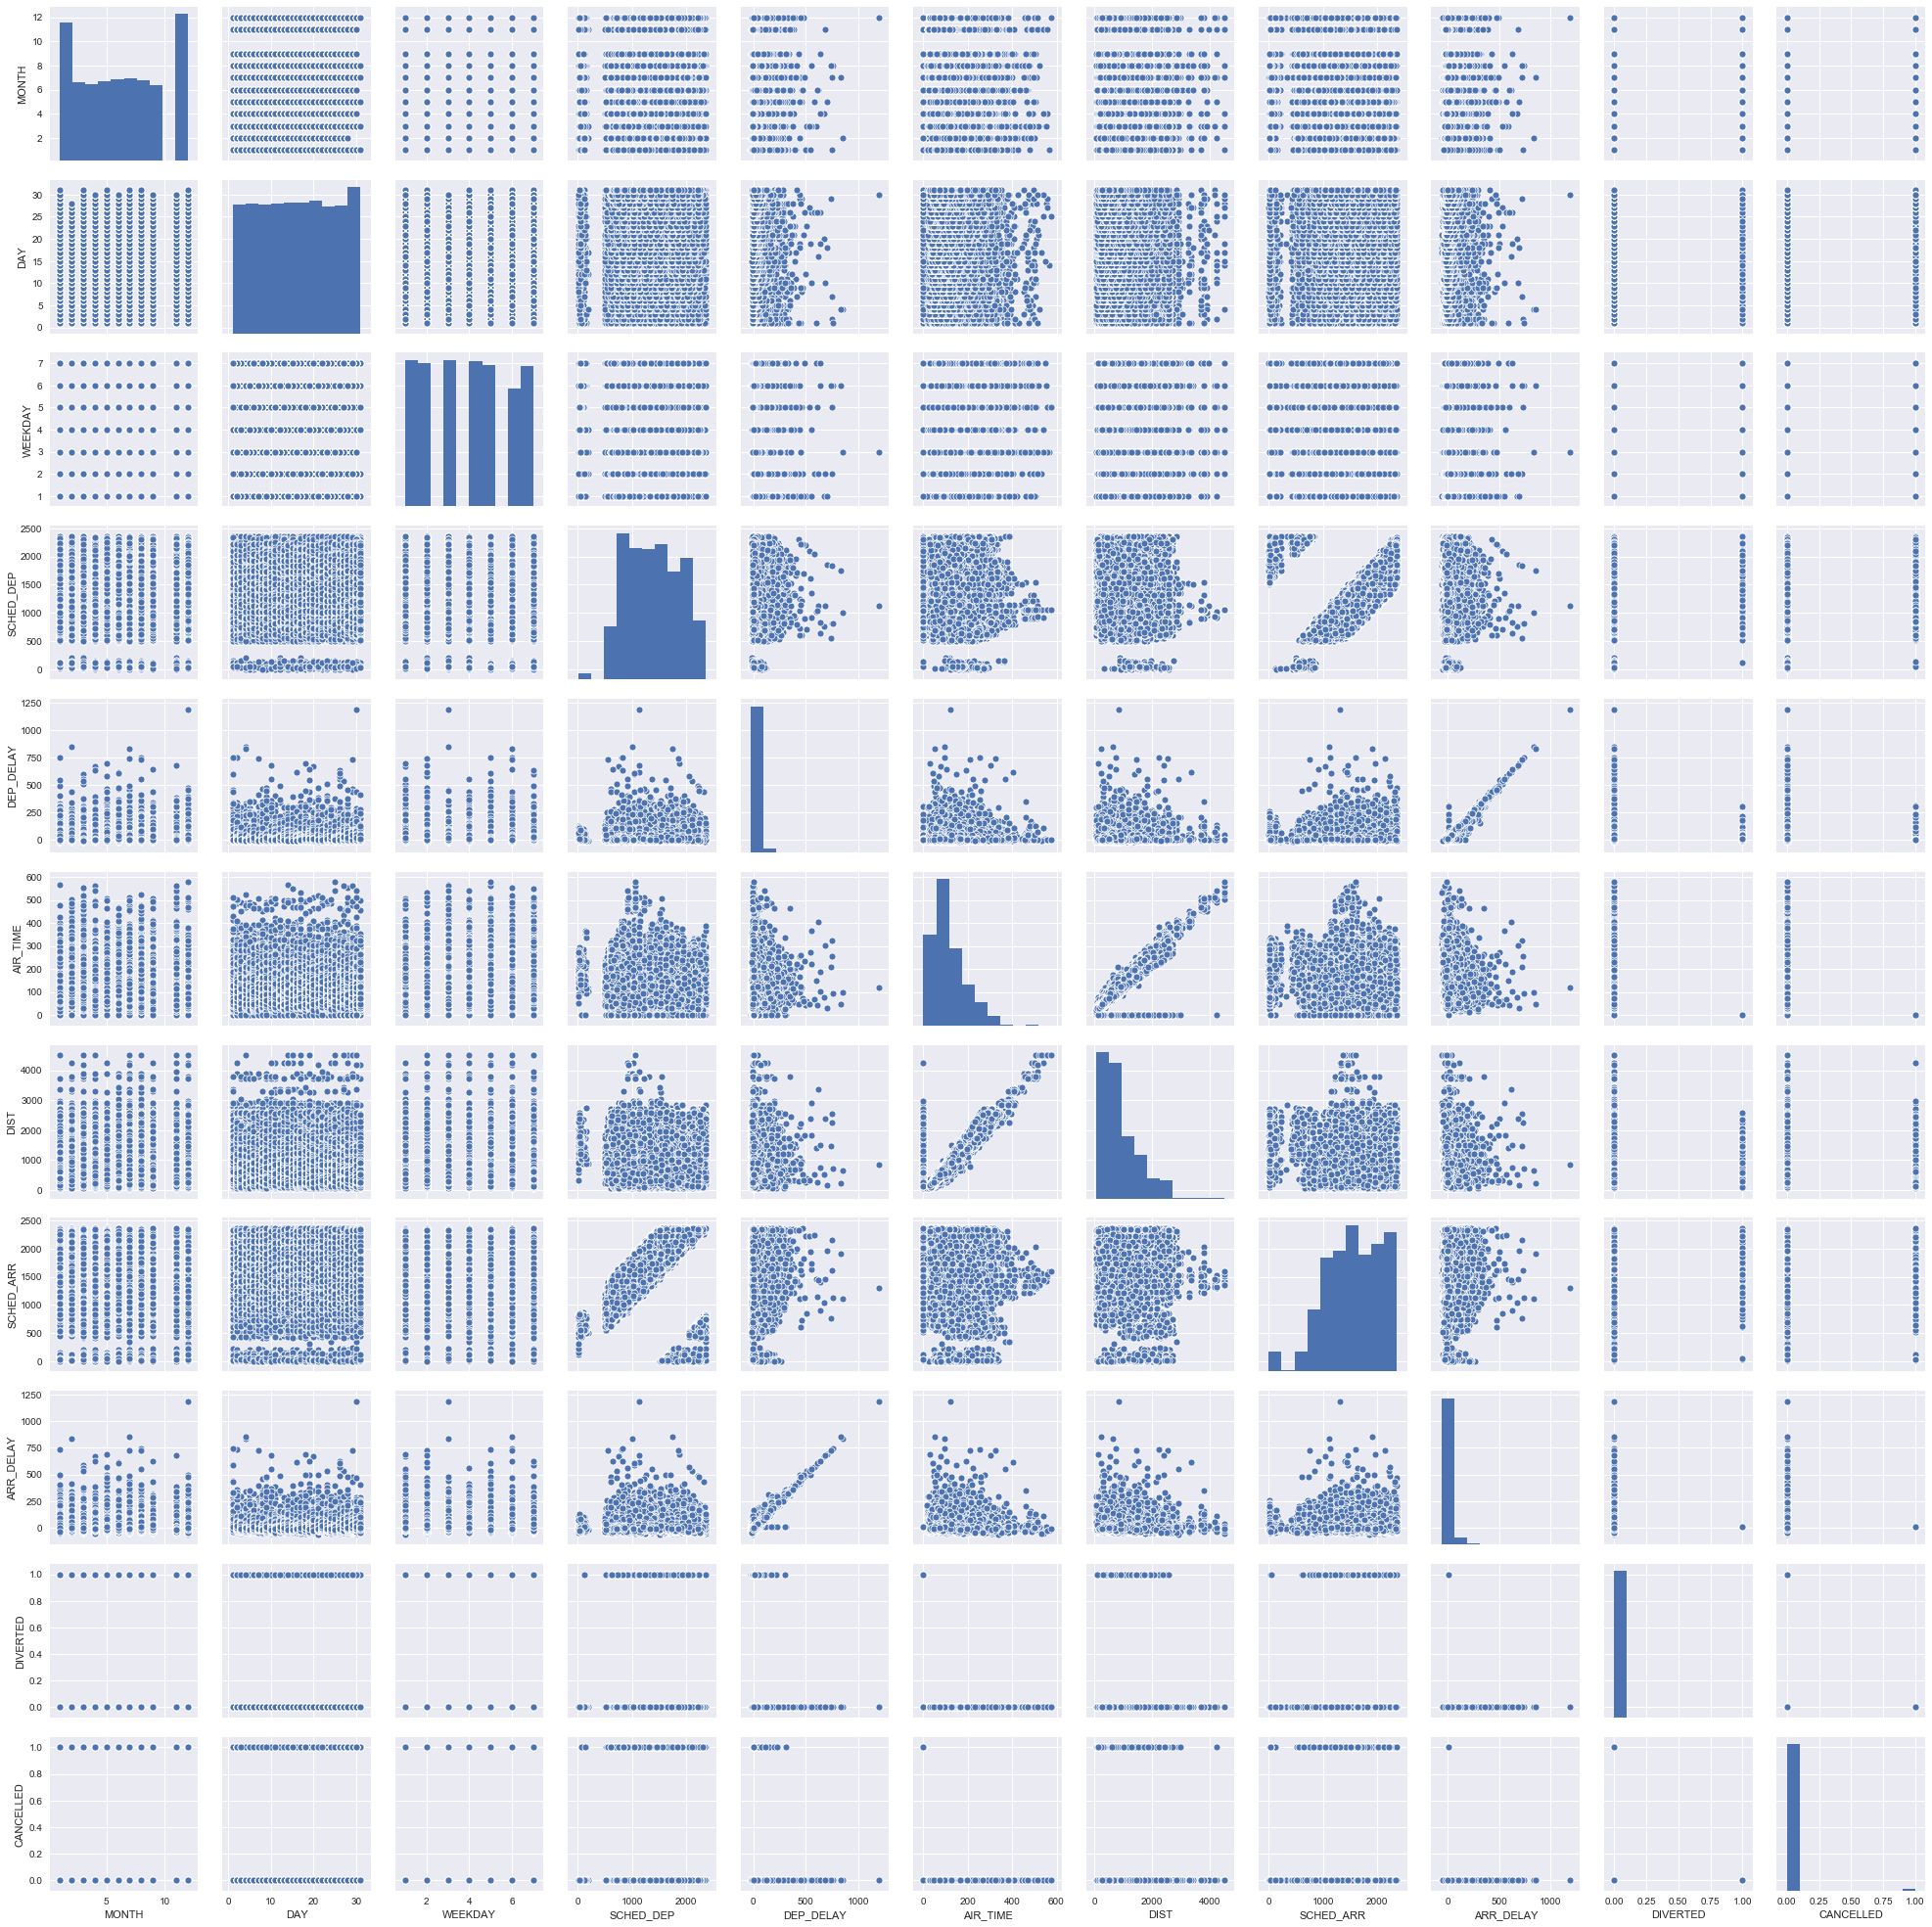

In [276]:
sns.pairplot(df)